In [47]:
! pip install seaborn
! pip install wordcloud pillow


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ------------------------ --------------- 92.2/151.4 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lyrics_df = pd.read_csv("Sample.csv")
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      195 non-null    int64 
 1   Artist Name     195 non-null    object
 2   Album           195 non-null    object
 3   Track Name      195 non-null    object
 4   Track Duration  195 non-null    int64 
 5   Is_Explicit     195 non-null    bool  
 6   Release Year    195 non-null    object
 7   Lyrics          195 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 11.0+ KB


# Average Song Duration

In [14]:
duration = lyrics_df.groupby("Artist Name")["Track Duration"].mean().to_frame().reset_index()
# duration["Track Duration"] = pd.to_timedelta(duration["Track Duration"], unit="ms")
duration["Artist Name"] = duration["Artist Name"].astype(str)
duration.head()

,Artist Name,Track Duration
0,$uicideboy$,173056.000000
1,21 Savage,227534.062500
2,Drake,227534.062500
3,Future,178764.409091
4,Kanye West,245788.625000


Text(0.5, 1.0, 'Average Song Duration by Artist in 2022')

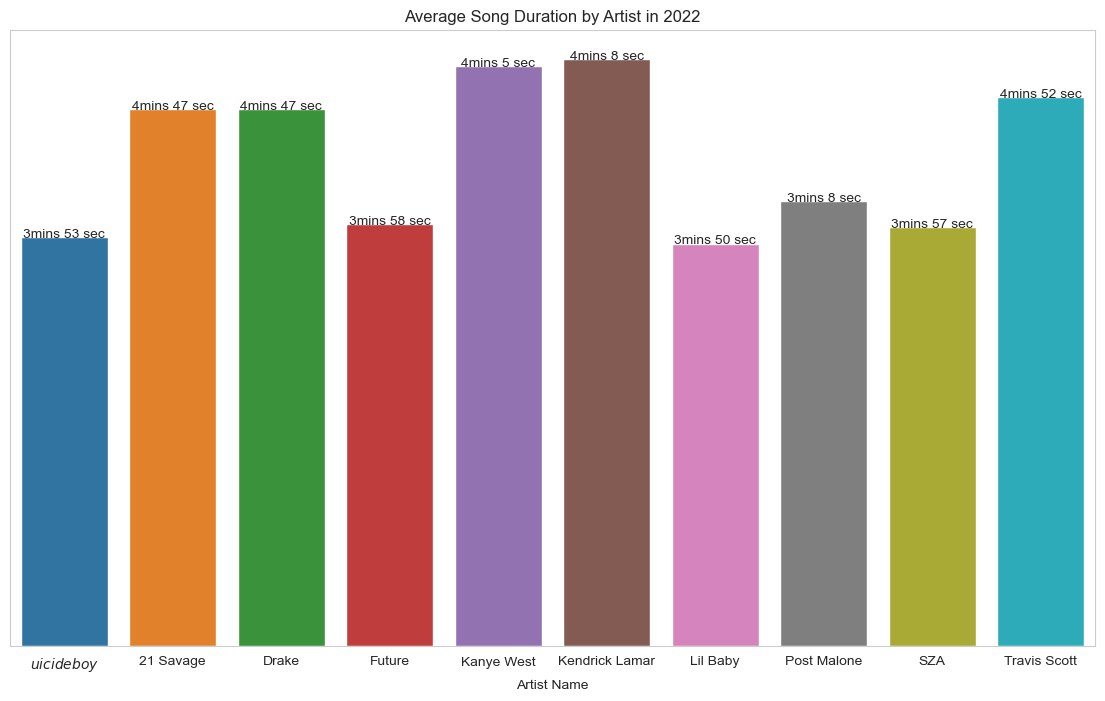

In [46]:
fig,ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")
sns.barplot(
    data=duration,
    x="Artist Name",
    y="Track Duration",
    ax=ax
)

for i,d in enumerate(duration["Track Duration"]):
    width = p.get_width()    # get bar length
    ax.text(i,d,       # set the text at 1 unit right of the bar
             # get Y coordinate + X coordinate / 2
            f"{d/60000:.0f}mins {(d%60000)//1000:.0f} sec",
            ha="center"
            )
ax.set_ylabel("Average Duration")
ax.get_yaxis().set_visible(False)
ax.set_title("Average Song Duration by Artist in 2022")


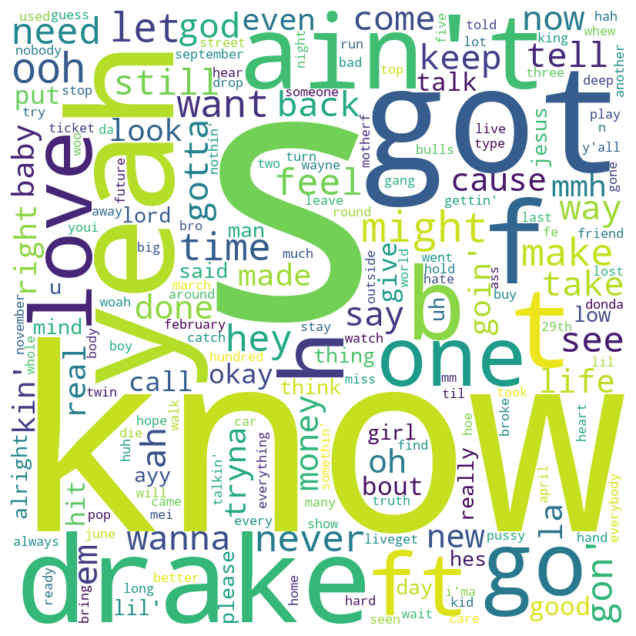

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Sample text data
text_data = (" ".join(lyrics_df["Lyrics"])).lower().replace("\n", "").replace("nigga", "").replace("shit", "s..t").replace("fuck","f..k").replace("bitch", "b...h")
# text_data
# Load a custom mask image

# mask = np.array(Image.open("custom_mask.png"))

# Create a WordCloud object with customizations
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      contour_width=2, contour_color='steelblue',
                      colormap='viridis', collocations=False).generate(text_data)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
